In [12]:
import pandas as pd
import numpy as np
from agent import Agent
from trading_env import TradingEnv
from trading_env_plotter import TradingEnvPlotter
from sklearn.model_selection import train_test_split

Episode 1/1 - Total Reward: 35003.24


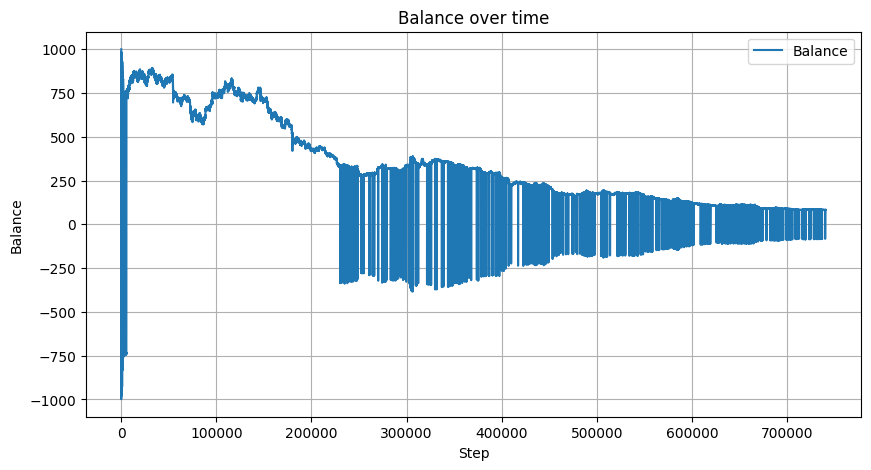

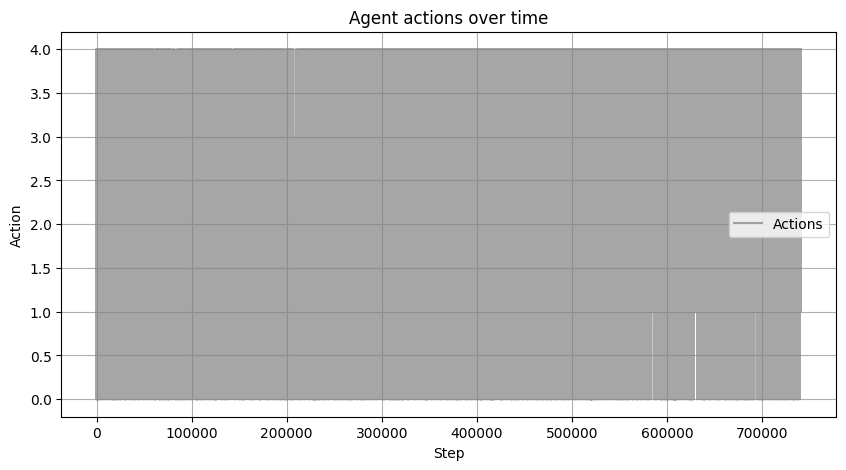

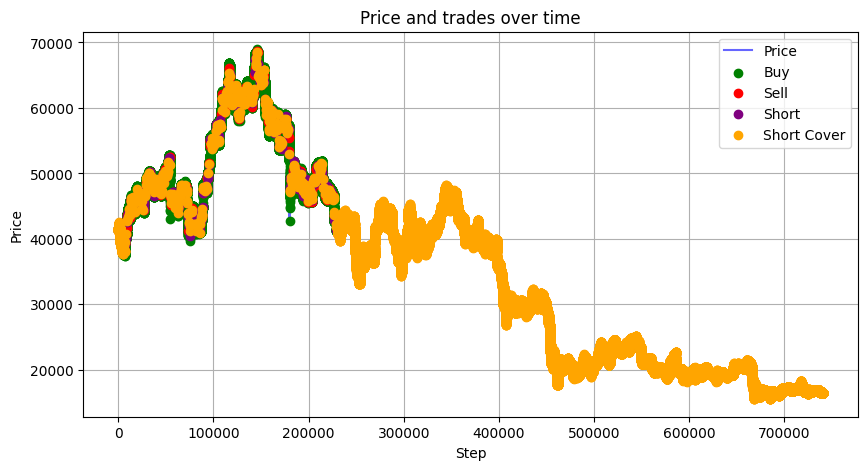

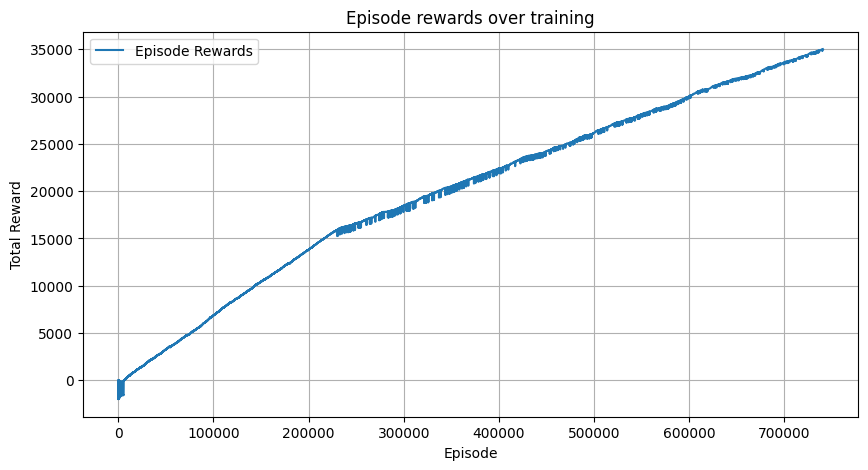

In [2]:
# Hyperparameters
EPISODES = 1 # 300
LEARNING_RATE = 0.001
GAMMA = 0.99
INPUT_DIM = 1


df = pd.read_csv('../csv/BTCUSDT_1m_20210801_20221231.csv')

# Assume 80% of the data is used for training and 20% for testing
train_df, test_df = train_test_split(df, test_size=0.2, shuffle=False)

prices = train_df['close'].values

env = TradingEnv(prices)
agent = Agent(INPUT_DIM, action_dim=5, learning_rate=LEARNING_RATE, gamma=GAMMA)
plotter = TradingEnvPlotter(env)

for episode in range(1, EPISODES + 1):
    state = env.reset()
    total_reward = 0

    while True:
        action = agent.select_action(state)
        next_state, reward, done = env.step(action)

        # teFor visualization later
        plotter.record_step(action)
        plotter.record_episode_reward(total_reward)

        agent.train(state, action, reward, next_state, done)

        state = next_state
        total_reward += reward
        # print(reward

        if done:
            break

    print(f"Episode {episode}/{EPISODES} - Total Reward: {total_reward:.2f}")

# Visualization after training
plotter.plot_balance()
plotter.plot_actions()
plotter.plot_prices_and_trades()
plotter.plot_episode_rewards()


In [3]:
agent.save_model('../model/model_scalping.pth')

In [ ]:
# Inference Phase
test_prices = test_df['close'].values

test_env = TradingEnv(test_prices)
test_plotter = TradingEnvPlotter(test_env)

# Load the trained model for inference
agent.load_model('../model/model_scalping.pth')

state = test_env.reset()
while True:
    action = agent.select_action(state)
    next_state, _, done = test_env.step(action)  # We don't need reward during inference

    # For visualization
    test_plotter.record_step(action)

    state = next_state
    if done:
        break

# Visualization after inference
test_plotter.plot_balance()
test_plotter.plot_actions()
test_plotter.plot_prices_and_trades()
